# PHÂN LỚP LETTER RECOGNITION BẰNG GAUSSIAN NAIVE BAYES
Dataset: UCI Letter Recognition (20,000 samples, 26 classes)

## Mục tiêu:
- Tìm hiểu dataset
- EDA & trực quan hoá dữ liệu
- Tiền xử lý
- Gaussian Naive Bayes thủ công
- GaussianNB sklearn
- Đánh giá & so sánh mô hình


#### Import thư viện

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB


#### Load Letter Recognition dataset

In [2]:
df = pd.read_csv("letter+recognition/letter-recognition.data", header=None)
df.head()


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0  T   2   8   3   5   1   8  13   0   6   6  10   8   0   8   0   8
1  I   5  12   3   7   2  10   5   5   4  13   3   9   2   8   4  10
2  D   4  11   6   8   6  10   6   2   6  10   3   7   3   7   3   9
3  N   7  11   6   6   3   5   9   4   6   4   4  10   6  10   2   8
4  G   2   1   3   1   1   8   6   6   6   6   5   9   1   7   5  10

#### Thêm tên cột (theo letter-recognition.names)

In [3]:
columns = [
    "letter", "x-box", "y-box", "width", "height", "onpix",
    "x-bar", "y-bar", "x2bar", "y2bar", "xybar",
    "xedge-x", "xedge-y", "yedge-x", "yedge-y",
    "x-ege", "y-ege"
]

df.columns = columns
df.head()


letter  x-box  y-box  width  height  onpix  x-bar  y-bar  x2bar  y2bar  \
0      T      2      8      3       5      1      8     13      0      6   
1      I      5     12      3       7      2     10      5      5      4   
2      D      4     11      6       8      6     10      6      2      6   
3      N      7     11      6       6      3      5      9      4      6   
4      G      2      1      3       1      1      8      6      6      6   

   xybar  xedge-x  xedge-y  yedge-x  yedge-y  x-ege  y-ege  
0      6       10        8        0        8      0      8  
1     13        3        9        2        8      4     10  
2     10        3        7        3        7      3      9  
3      4        4       10        6       10      2      8  
4      6        5        9        1        7      5     10

#### Thông tin dataset

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   letter   20000 non-null  object
 1   x-box    20000 non-null  int64 
 2   y-box    20000 non-null  int64 
 3   width    20000 non-null  int64 
 4   height   20000 non-null  int64 
 5   onpix    20000 non-null  int64 
 6   x-bar    20000 non-null  int64 
 7   y-bar    20000 non-null  int64 
 8   x2bar    20000 non-null  int64 
 9   y2bar    20000 non-null  int64 
 10  xybar    20000 non-null  int64 
 11  xedge-x  20000 non-null  int64 
 12  xedge-y  20000 non-null  int64 
 13  yedge-x  20000 non-null  int64 
 14  yedge-y  20000 non-null  int64 
 15  x-ege    20000 non-null  int64 
 16  y-ege    20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


letter     0
x-box      0
y-box      0
width      0
height     0
onpix      0
x-bar      0
y-bar      0
x2bar      0
y2bar      0
xybar      0
xedge-x    0
xedge-y    0
yedge-x    0
yedge-y    0
x-ege      0
y-ege      0
dtype: int64

Kết luận:

- Không có missing value.

- 20.000 mẫu, 26 lớp.

- 16 đặc trưng dạng số nguyên 0–15.

#### Phân bố số lượng theo từng chữ cái

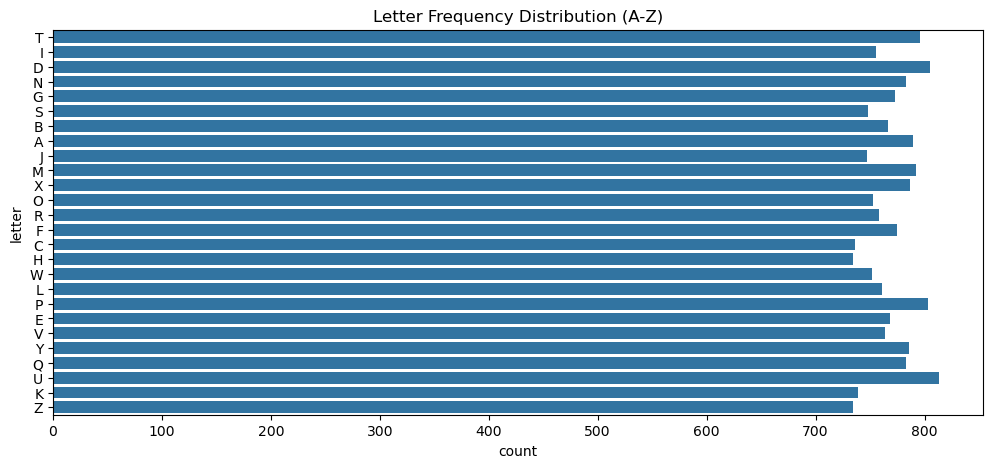

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(df["letter"])
plt.title("Letter Frequency Distribution (A-Z)")
plt.show()


#### Histogram cho 16 features

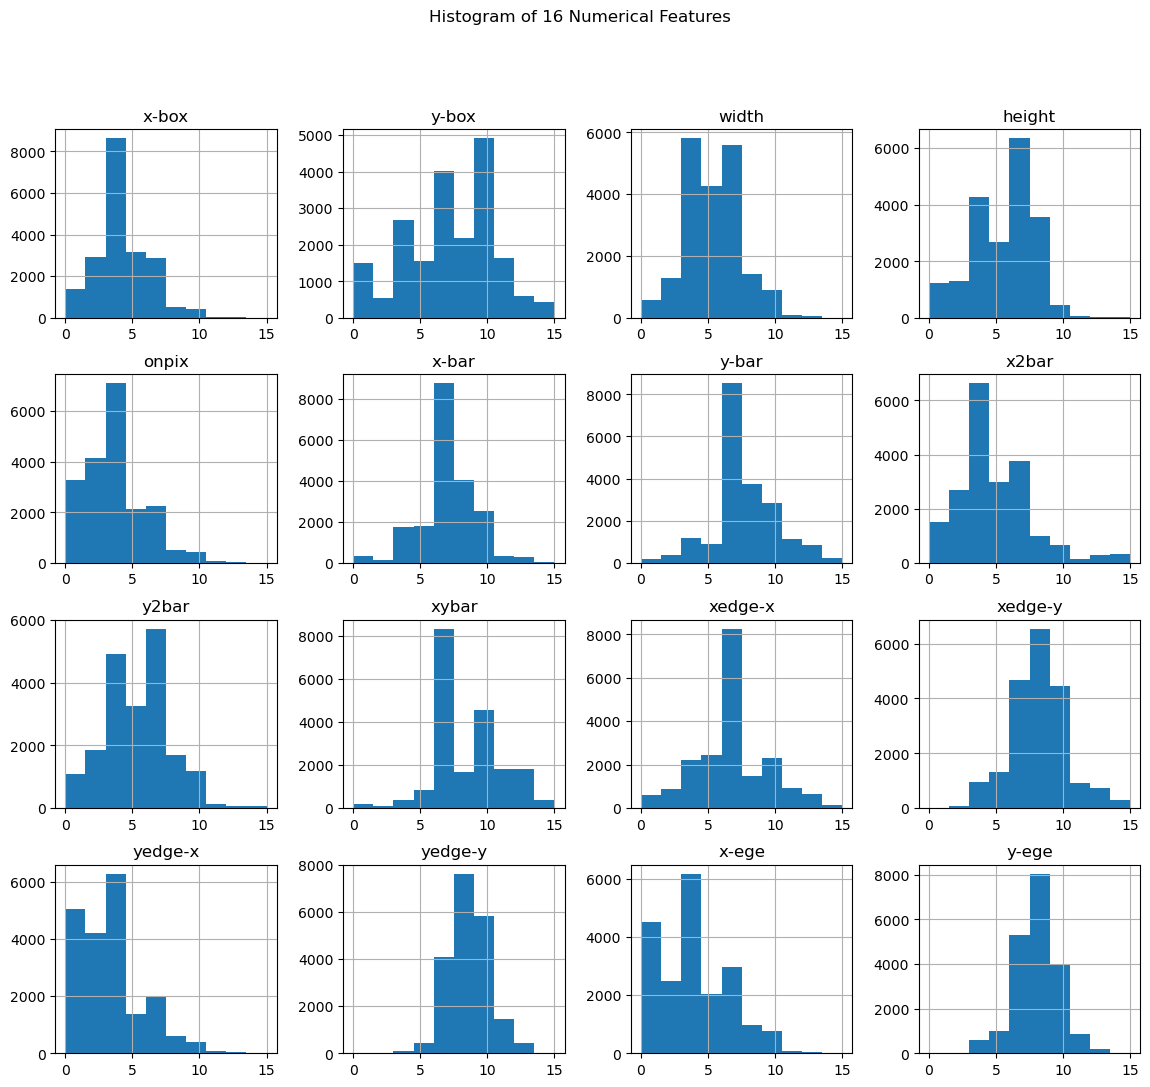

In [6]:
df.iloc[:, 1:].hist(figsize=(14,12))
plt.suptitle("Histogram of 16 Numerical Features")
plt.show()


#### Heatmap tương quan

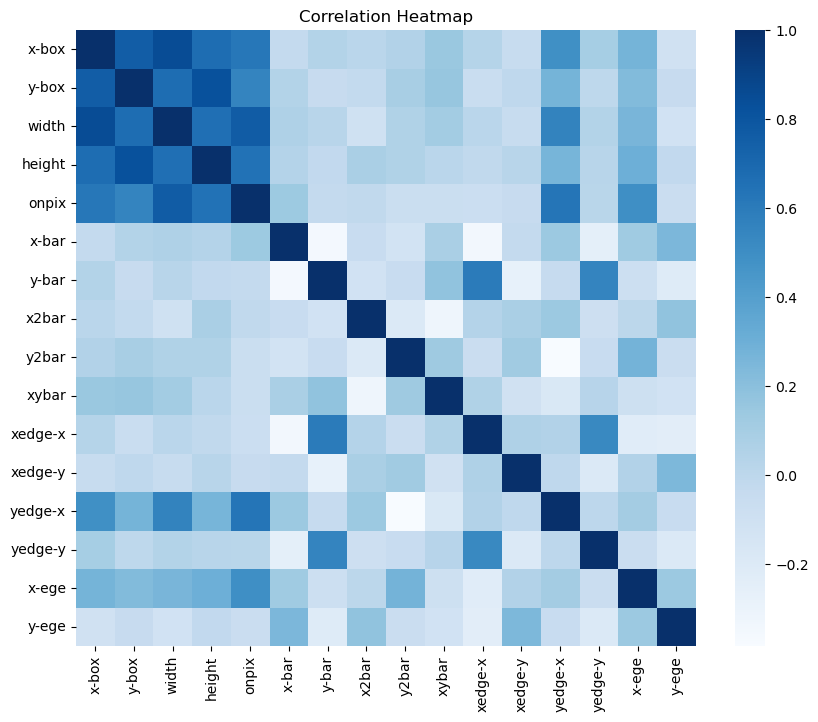

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:, 1:].corr(), annot=False, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


#### Chia X, y

In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values


#### Train/Test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)


#### Chuẩn hóa dữ liệu

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### NAIVE BAYES THỦ CÔNG

In [11]:
class MyGaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.prior = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = X_c.mean(axis=0)
            self.var[c] = X_c.var(axis=0) + 1e-9
            self.prior[c] = X_c.shape[0] / X.shape[0]

    def gaussian_pdf(self, x, mean, var):
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x-mean)**2) / (2 * var))

    def predict_one(self, x):
        posteriors = {}

        for c in self.classes:
            prior = np.log(self.prior[c])
            likelihood = np.sum(np.log(self.gaussian_pdf(x, self.mean[c], self.var[c])))
            posteriors[c] = prior + likelihood
        
        return max(posteriors, key=posteriors.get)

    def predict(self, X):
        return np.array([self.predict_one(x) for x in X])


#### Train & Evaluate thủ công

In [12]:
nb = MyGaussianNB()
nb.fit(X_train_scaled, y_train)

y_pred_manual = nb.predict(X_test_scaled)

print("Manual Gaussian NB Accuracy:", accuracy_score(y_test, y_pred_manual))
print(classification_report(y_test, y_pred_manual))


Manual Gaussian NB Accuracy: 0.648
              precision    recall  f1-score   support

           A       0.86      0.91      0.88       149
           B       0.51      0.69      0.59       153
           C       0.70      0.70      0.70       137
           D       0.60      0.78      0.68       156
           E       0.62      0.40      0.48       141
           F       0.65      0.74      0.69       140
           G       0.55      0.54      0.55       160
           H       0.51      0.31      0.39       144
           I       0.56      0.77      0.65       146
           J       0.84      0.74      0.79       149
           K       0.49      0.45      0.47       130
           L       0.99      0.76      0.86       155
           M       0.70      0.90      0.79       168
           N       0.89      0.67      0.77       151
           O       0.48      0.74      0.58       145
           P       0.89      0.73      0.80       173
           Q       0.63      0.55      0.59   

#### Train sklearn GaussianNB

In [13]:
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)

y_pred_sklearn = clf.predict(X_test_scaled)

print("Sklearn GaussianNB Accuracy:", accuracy_score(y_test, y_pred_sklearn))
print(classification_report(y_test, y_pred_sklearn))


Sklearn GaussianNB Accuracy: 0.648
              precision    recall  f1-score   support

           A       0.86      0.91      0.88       149
           B       0.51      0.69      0.59       153
           C       0.70      0.70      0.70       137
           D       0.60      0.78      0.68       156
           E       0.62      0.40      0.48       141
           F       0.65      0.74      0.69       140
           G       0.55      0.54      0.55       160
           H       0.51      0.31      0.39       144
           I       0.56      0.77      0.65       146
           J       0.84      0.74      0.79       149
           K       0.49      0.45      0.47       130
           L       0.99      0.76      0.86       155
           M       0.70      0.90      0.79       168
           N       0.89      0.67      0.77       151
           O       0.48      0.74      0.58       145
           P       0.89      0.73      0.80       173
           Q       0.63      0.55      0.59   

#### Confusion Matrix

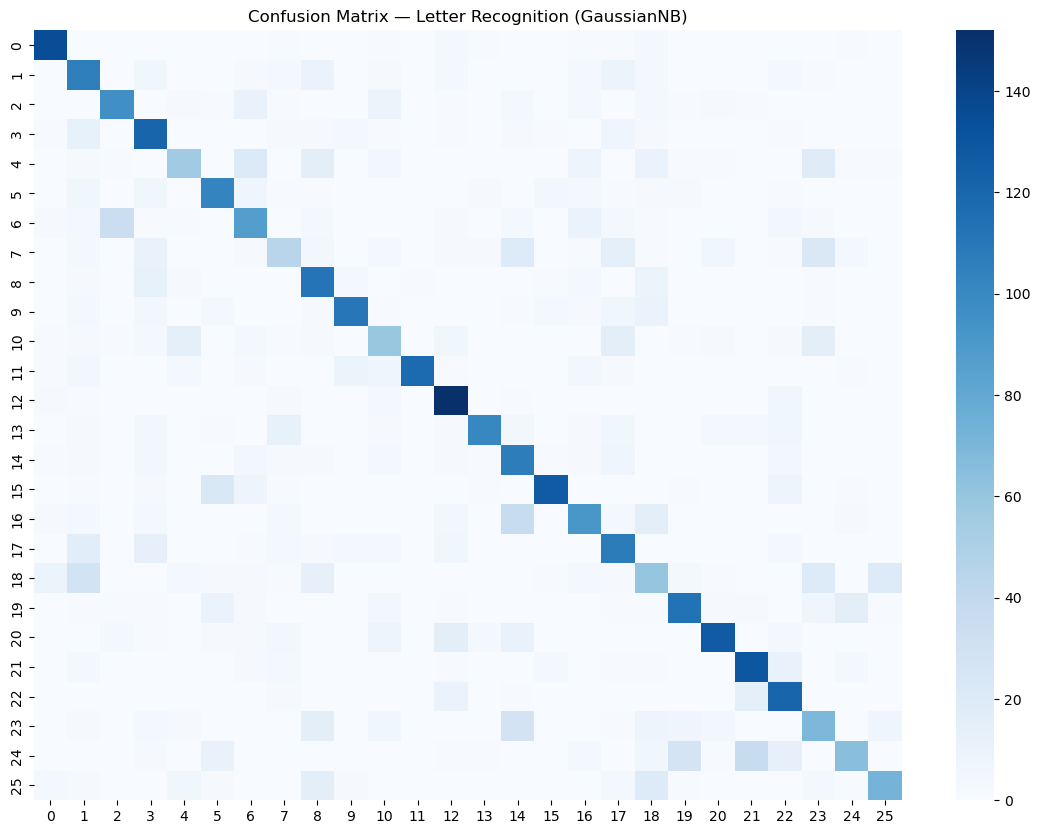

In [14]:
plt.figure(figsize=(14,10))
sns.heatmap(confusion_matrix(y_test, y_pred_sklearn), cmap="Blues")
plt.title("Confusion Matrix — Letter Recognition (GaussianNB)")
plt.show()
